<a href="https://colab.research.google.com/github/pranavmp-10-000/CassavaDiseaseClassification/blob/main/cassavaclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Data Import

In [1]:
! pip uninstall kaggle
!pip install kaggle

Uninstalling kaggle-1.5.10:
  Would remove:
    /usr/local/bin/kaggle
    /usr/local/lib/python3.6/dist-packages/kaggle-1.5.10.dist-info/*
    /usr/local/lib/python3.6/dist-packages/kaggle/*
Proceed (y/n)? y
  Successfully uninstalled kaggle-1.5.10
     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=6bcf6f43ad5c4e151403d8126a75f9bfa8d763d2d49fbbbad91841a49c6cb8b4
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle


In [2]:
from google.colab import files

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!mkdir /content/data

In [ ]:
!kaggle competitions files cassava-leaf-disease-classification

In [6]:
!kaggle competitions download -c cassava-leaf-disease-classification -p /content/data -f train.csv

404 - Not Found


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow_hub as hub
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import glob
from functools import partial
import IPython.display as display
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/data/train.csv


In [8]:
tf.random.set_seed(10)

In [ ]:
!unzip data/\*.zip -d /content/data

unzip:  cannot find or open data/*.zip, data/*.zip.zip or data/*.zip.ZIP.

No zipfiles found.


In [9]:
try: # detect TPUs
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # no TPU found, detect GPUs
    strategy = tf.distribute.MirroredStrategy() # for GPU or multi-GPU machines
    #strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
    #strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy() # for clusters of multi-GPU machines

print("Number of accelerators: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Initializing the TPU system: grpc://10.111.176.234:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.111.176.234:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of accelerators:  8


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
GCS_PATH = 'gs://kds-ac6f3a808fe8c761c0ecf2c65a91a1738280d65067984545e25cd4fb'
IMAGE_SIZE = [512,512]

In [11]:
train_records = pd.read_csv('/content/data/train.csv')
#test_records = pd.read_csv('../input/cassava-leaf-disease-classification/test.csv')
train_records.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [12]:
data_value_c = pd.DataFrame(train_records['label'].value_counts())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


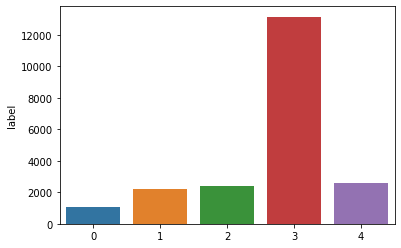

In [13]:
sns.barplot(data_value_c.index,data_value_c.label)

In [14]:
class_weights = train_records.groupby(['label']).count()
class_weights['image_id'] = class_weights.image_id/train_records.shape[0]

In [15]:
cl_w = class_weights.image_id.to_dict()

In [16]:
TRAIN_DIRECTORY = '/content/data/'
#TEST_DIRECTORY = '../input/cassava-leaf-disease-classification/test_images/'

In [17]:
def submit_gen(model,classes,dataset_path,col='image_id'):
  test_data = os.listdir(dataset_path)
  pred_array=[]
  for i in test_data:
    img = tf.keras.preprocessing.image.load_img(
        dataset_path+i,target_size=(512,512))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    prediction = np.squeeze(model.predict(img_array))
    name_c = classes[np.argmax(prediction)]
    pred_array.append(name_c)
  return pred_array,test_data

In [18]:
gs_filenames = tf.io.gfile.glob(GCS_PATH + "/train_tfrecords/*.tfrec")
gs_filenames

['gs://kds-ac6f3a808fe8c761c0ecf2c65a91a1738280d65067984545e25cd4fb/train_tfrecords/ld_train00-1338.tfrec',
 'gs://kds-ac6f3a808fe8c761c0ecf2c65a91a1738280d65067984545e25cd4fb/train_tfrecords/ld_train01-1338.tfrec',
 'gs://kds-ac6f3a808fe8c761c0ecf2c65a91a1738280d65067984545e25cd4fb/train_tfrecords/ld_train02-1338.tfrec',
 'gs://kds-ac6f3a808fe8c761c0ecf2c65a91a1738280d65067984545e25cd4fb/train_tfrecords/ld_train03-1338.tfrec',
 'gs://kds-ac6f3a808fe8c761c0ecf2c65a91a1738280d65067984545e25cd4fb/train_tfrecords/ld_train04-1338.tfrec',
 'gs://kds-ac6f3a808fe8c761c0ecf2c65a91a1738280d65067984545e25cd4fb/train_tfrecords/ld_train05-1338.tfrec',
 'gs://kds-ac6f3a808fe8c761c0ecf2c65a91a1738280d65067984545e25cd4fb/train_tfrecords/ld_train06-1338.tfrec',
 'gs://kds-ac6f3a808fe8c761c0ecf2c65a91a1738280d65067984545e25cd4fb/train_tfrecords/ld_train07-1338.tfrec',
 'gs://kds-ac6f3a808fe8c761c0ecf2c65a91a1738280d65067984545e25cd4fb/train_tfrecords/ld_train08-1338.tfrec',
 'gs://kds-ac6f3a808fe8c761c

In [66]:
split_ind = int(0.9 * len(gs_filenames))
TRAINING_FILENAMES, VALID_FILENAMES = gs_filenames[:split_ind], gs_filenames[split_ind:]
dataset = tf.data.TFRecordDataset(filenames=TRAINING_FILENAMES)
val_dataset = tf.data.TFRecordDataset(filenames=VALID_FILENAMES)

In [67]:
def augment(image):
  #image = tf.keras.preprocessing.image.(image,channels=3)
  image = tf.image.random_flip_left_right(image,seed=2)
  image = tf.keras.preprocessing.image.img_to_array(image)
  #image = tf.reshape(image,(3,512,512))
  image = tf.keras.preprocessing.image.random_rotation(image,35,row_axis=1 ,col_axis=0, channel_axis=2)
  image = tf.keras.preprocessing.image.random_shear(image,5,row_axis=1 ,col_axis=0, channel_axis=2)
  image = tf.keras.preprocessing.image.random_shift(image,0.1,0.1,row_axis=1 ,col_axis=0, channel_axis=2)
  #image = tf.reshape(image,(*IMAGE_SIZE,3))
  image = tf.keras.preprocessing.image.array_to_img(image)
  return image

In [68]:
image_feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'image_name': tf.io.FixedLenFeature([], tf.string),
    'target': tf.io.FixedLenFeature([], tf.int64),
    
}

def _parse_image_function(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  example = tf.io.parse_single_example(example_proto, image_feature_description)
  image = tf.image.decode_jpeg(example['image'],channels=3)
  image = tf.cast(image, tf.float32)
  image = tf.reshape(image,[*IMAGE_SIZE,3])
  label = tf.cast(example["target"], tf.int32)
  return image,label

In [69]:
parsed_image_dataset = dataset.map(partial( _parse_image_function),num_parallel_calls=AUTOTUNE)

In [70]:
val_image_dataset = val_dataset.map(partial( _parse_image_function),num_parallel_calls=AUTOTUNE)

In [71]:
for i,x in parsed_image_dataset.take(1):
  print(i.shape)

(512, 512, 3)


In [72]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(35),
    #tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.2,),
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255)])

In [73]:
train_aug_ds = parsed_image_dataset.filter(lambda x,y: tf.math.not_equal(y,3))
val_aug_ds = val_image_dataset.filter(lambda x,y: tf.math.not_equal(y,3))
train_aug_ds = train_aug_ds.batch(32)
val_aug_ds = val_aug_ds.batch(32)
train_aug_ds = train_aug_ds.map(lambda x,y:(data_augmentation(x),y))
val_aug_ds = val_aug_ds.map(lambda x,y:(data_augmentation(x),y))
for i,x in train_aug_ds.take(1):
  print(i.shape)


(32, 512, 512, 3)


In [74]:
aug_train_ds =train_aug_ds.unbatch()
aug_val_ds = val_aug_ds.unbatch()
parsed_image_dataset = parsed_image_dataset.concatenate(aug_train_ds)
val_image_dataset = val_image_dataset.concatenate(aug_val_ds)

In [75]:
def create_dataset(dataset):    
    # Set the number of datapoints you want to load and shuffle 
    dataset = dataset.shuffle(4096)
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    # Set the batchsize
    dataset = dataset.batch(64)

    return dataset

In [76]:
train_dataset = create_dataset(parsed_image_dataset)
validation_dataset = create_dataset(val_image_dataset)

In [30]:
#train_dataset = train_dataset.map(lambda x,y:(data_augmentation(x),y))
#validation_dataset = validation_dataset.map(lambda x,y:(data_augmentation(x),y))

# Preprocessing - Tensorflow

In [ ]:
datagen_train = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
      horizontal_flip=True,
      #width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.3,
      rescale=1./255, validation_split=.1,
      )
train_generator = datagen_train.flow_from_directory(
    train_dataset., shuffle=True,subset='training')

In [ ]:
datagen_val = tf.keras.preprocessing.image.ImageDataGenerator(
    #rotation_range=40,
      horizontal_flip=True,
      #width_shift_range=0.2, height_shift_range=0.2,
      #shear_range=0.2, zoom_range=0.2,
      rescale=1./255, validation_split=.1,
      )
val_generator = datagen_val.NumpyArrayIterator(
    TRAIN_IMAGE_DIRECTORY,target_size=(256,256), shuffle=True,subset='validation',class_mode='sparse')

# Model - Tensorflow

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(35),
  tf.keras.layers.experimental.preprocessing.RandomZoom(
    height_factor=0.2,),
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255
    )
  ""
])

SyntaxError: ignored

### Pretrained Model

In [38]:
with strategy.scope():
    base = tf.keras.applications.EfficientNetB1(include_top=False,input_shape=(*IMAGE_SIZE,3),
                                                weights='imagenet'
                                            )
    base.trainable = False
    inputs = tf.keras.layers.Input([*IMAGE_SIZE, 3])
    pre_layer = tf.keras.applications.efficientnet.preprocess_input(inputs)#.get_layer(
    base_model = base(pre_layer)
    base_model = tf.keras.layers.GlobalAveragePooling2D()(base_model)
    base_model = tf.keras.layers.Flatten()(base_model)
    base_model = tf.keras.layers.Dense(1024,activation='relu',kernel_regularizer=tf.keras.regularizers.l2())(base_model)
    base_model = tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.l2())(base_model)
    base_model = tf.keras.layers.Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2())(base_model)
    base_model = tf.keras.layers.Dense(128,activation='relu')(base_model)
    base_model = tf.keras.layers.Dense(64,activation='relu',)(base_model)
    base_model = tf.keras.layers.Dense(32,activation='relu',)(base_model)
    base_model = tf.keras.layers.Dense(8,activation='relu',)(base_model)
    base_model = tf.keras.layers.Dropout(0.2)(base_model)
    base_model = tf.keras.layers.Dense(5,activation='softmax')(base_model)
    
    model_efficient_net = tf.keras.Model(inputs=inputs,outputs=base_model)



In [ ]:
base.summary()

In [62]:
model_efficient_net.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
efficientnetb1 (Functional)  (None, 16, 16, 1280)      6575239   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_10 (Dense)             (None, 256)              

In [63]:
model_efficient_net.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [64]:
initial_learning_rate_e = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate_e, decay_steps=100, decay_rate=0.96, staircase=True
)

checkpoint_cb_e = tf.keras.callbacks.ModelCheckpoint(
    "efficient_net_best_model.h5", save_best_only=True
)

early_stopping_cb_e = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

In [60]:
base.trainable = True

In [77]:
epochs=10
history = model_efficient_net.fit(
  train_dataset,
  epochs=epochs,
  validation_data = validation_dataset,
  callbacks=[checkpoint_cb_e, early_stopping_cb_e]
  #class_weight = cl_w
  #steps_per_epoch = 600
  #validation_data = val_generator,

 
)

Epoch 1/10
    406/Unknown - 344s 846ms/step - loss: 0.6925 - accuracy: 0.7291WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0089s vs `on_test_batch_end` time: 0.1163s). Check your callbacks.


406/406 [==============================] - 352s 867ms/step - loss: 0.6925 - accuracy: 0.7291 - val_loss: 1.1960 - val_accuracy: 0.6049
Epoch 2/10
406/406 [==============================] - 239s 588ms/step - loss: 0.6674 - accuracy: 0.7374 - val_loss: 0.7949 - val_accuracy: 0.7283
Epoch 3/10
406/406 [==============================] - 240s 591ms/step - loss: 0.6366 - accuracy: 0.7485 - val_loss: 0.7245 - val_accuracy: 0.7572
Epoch 4/10
406/406 [==============================] - 239s 588ms/step - loss: 0.6104 - accuracy: 0.7578 - val_loss: 0.8854 - val_accuracy: 0.7122
Epoch 5/10
406/406 [==============================] - 239s 588ms/step - loss: 0.5951 - accuracy: 0.7657 - val_loss: 0.7734 - val_accuracy: 0.7332
Epoch 6/10
406/406 [==============================] - 242s 595ms/step - loss: 0.5762 - accuracy: 0.7772 - val_loss: 0.6729 - val_accuracy: 0.7801
Epoch 7/10
406/406 [==============================] - 241s 594ms/step - loss: 0.5526 - accuracy: 0.7832 - val_loss: 0.6298 - val_accura

In [46]:
model_efficient_net.save('efficientnet_B1_model.h5')

### Custom Model

In [ ]:
with strategy.scope():
  input_img = tf.keras.layers.Input(shape=(512,512,3), name='ImageInput')
  x = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_1')(input_img)
  x = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_2')(x)
  x = tf.keras.layers.MaxPooling2D((2,2), name='pool1')(x)
  
  x = tf.keras.layers.SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_1')(x)
  x = tf.keras.layers.SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_2')(x)
  x = tf.keras.layers.MaxPooling2D((2,2), name='pool2')(x)
  
  x = tf.keras.layers.SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_1')(x)
  x = tf.keras.layers.BatchNormalization(name='bn1')(x)
  x = tf.keras.layers.SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_2')(x)
  x = tf.keras.layers.BatchNormalization(name='bn2')(x)
  x = tf.keras.layers.SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_3')(x)
  x = tf.keras.layers.MaxPooling2D((2,2), name='pool3')(x)
  
  x = tf.keras.layers.SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_1')(x)
  x = tf.keras.layers.BatchNormalization(name='bn3')(x)
  x = tf.keras.layers.SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_2')(x)
  x = tf.keras.layers.BatchNormalization(name='bn4')(x)
  x = tf.keras.layers.SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_3')(x)
  x = tf.keras.layers.MaxPooling2D((2,2), name='pool4')(x)
  
  x = tf.keras.layers.Flatten(name='flatten')(x)
  x = tf.keras.layers.Dense(1024, activation='relu', name='fc1')(x)
  x = tf.keras.layers.Dropout(0.7, name='dropout1')(x)
  x = tf.keras.layers.Dense(512, activation='relu', name='fc2')(x)
  x = tf.keras.layers.Dropout(0.5, name='dropout2')(x)
  x = tf.keras.layers.Dense(5, activation='softmax', name='fc3')(x)
  
  model_custom = tf.keras.Model(inputs=input_img,outputs=x)

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100, decay_rate=0.96, staircase=True
)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "best_model.h5", save_best_only=True
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

In [ ]:
model_custom.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      [(None, 512, 512, 3)]     0         
_________________________________________________________________
Conv1_1 (Conv2D)             (None, 512, 512, 64)      1792      
_________________________________________________________________
Conv1_2 (Conv2D)             (None, 512, 512, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 256, 256, 64)      0         
_________________________________________________________________
Conv2_1 (SeparableConv2D)    (None, 256, 256, 128)     8896      
_________________________________________________________________
Conv2_2 (SeparableConv2D)    (None, 256, 256, 128)     17664     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 128, 128, 128)   

In [ ]:
model_custom.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model_custom.fit(
  train_dataset,
  epochs=epochs,
  validation_data = validation_dataset,
  callbacks=[checkpoint_cb, early_stopping_cb]
  #class_weight = cl_w
  #steps_per_epoch = 600
  #validation_data = val_generator,

 
)

Epoch 1/10


ResourceExhaustedError: ignored

In [ ]:
model_custom.optimizer._decayed_lr(tf.float32).numpy()

In [ ]:
model_custom.save('effecienetcustom_B4_model.h5')

# Prediction

In [ ]:
prediction,test_data = submit_gen(model_efficient_net,
                                  classes=sorted(train_records.label.unique()),
                                  dataset_path='/content/test/')

In [ ]:
test_data

['2216849948.jpg']

In [ ]:
submission = pd.DataFrame({"image_id":np.squeeze(test_data),"label":prediction})
submission.head()

,image_id,label
0,2216849948.jpg,4


In [ ]:
submission.to_csv('submission.csv',index=False)

In [ ]:
model_res.save('initial_model.h5')

In [ ]:
!rm -R ./data_train